In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split  # Ensure this is imported
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Encode 'Sex' column: male=0, female=1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encode 'Embarked' column: S=0, C=1, Q=2
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


df['Age'] = df['Age'].fillna(df['Age'].median())  # Fill missing Age with median value

# Check if there are any modes available and safely handle the situation
embarked_mode = df['Embarked'].mode()

# If the mode exists, fill missing values, otherwise handle it as a special case
if not embarked_mode.empty:
    df['Embarked'] = df['Embarked'].fillna(embarked_mode.iloc[0])
else:
    # If no mode is found, you can choose a default value (e.g., 'S' for port 'S')
    df['Embarked'] = df['Embarked'].fillna('S')

# Convert 'Pclass', 'SibSp', 'Parch', 'Fare' to numeric values if necessary
df['Pclass'] = df['Pclass'].astype(int)
df['SibSp'] = df['SibSp'].astype(int)
df['Parch'] = df['Parch'].astype(int)
df['Fare'] = df['Fare'].astype(float)


In [16]:
# Features (independent variables)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Target variable
y = df['Survived']


In [19]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Standardize the features to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# Initialize the KNN classifier (using 5 neighbors as a starting point)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [22]:
# Make predictions using the test data
y_pred = knn.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8101


In [23]:
# List of random states to test
random_states = [1, 10, 42]

# Initialize a list to store the accuracy for each random state
accuracies = []

# Train and evaluate the KNN model for each random state
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Standardize the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the KNN model
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Accuracy for random_state={random_state}: {accuracy:.4f}")


Accuracy for random_state=1: 0.7709
Accuracy for random_state=10: 0.8212
Accuracy for random_state=42: 0.8101


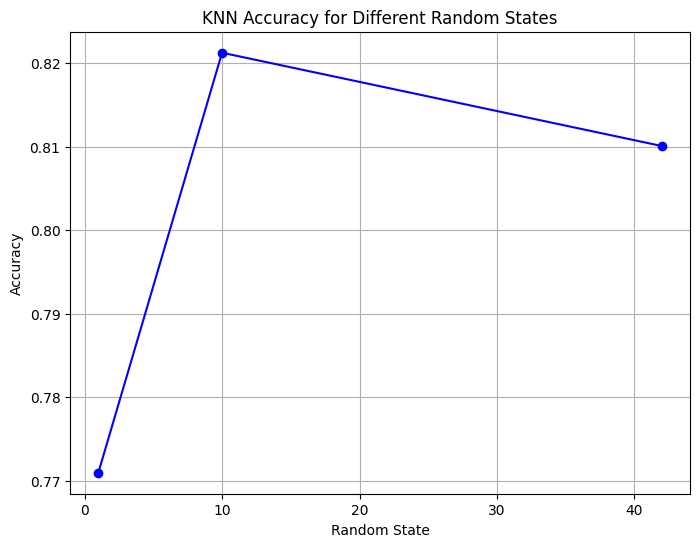

In [24]:
# Plotting the accuracy for different random states
plt.figure(figsize=(8, 6))
plt.plot(random_states, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Random States')
plt.grid(True)
plt.show()


Conclusion:-

Feature Engineering: We encoded categorical variables (Sex and Embarked) into numeric values so they could be used by the KNN algorithm.

Model Training and Evaluation: We split the dataset into training and testing sets and evaluated the KNN model with different random states to observe how accuracy varied.

Visualization: We plotted a graph to show the accuracy for different random states, which helped us analyze the impact of random states on model performance.